## Data Cleaning

### Approach

- Importing and inspecting the data sets.
- After that -> cleaning the data accordingly.
- Creating Meta-Data for all the data sets.

#### Importing Libraries

In [3]:
# Importing python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import seaborn as sns
import requests 
import sqlalchemy as sql
import dotenv


In [4]:
# Checking the directory currently in
import os
print(os.getcwd())


/Users/andreasdangaris/NeueFische/capstone_project_ev/capstone_project_ev/registered_cars


In [5]:
# Displaying up to 100 columns
pd.set_option('display.max_columns', 100)

In [6]:
# Creating DataFrame from xlsx file in repo
df_registered_cars = pd.read_excel('registration_08_23.xlsx')

In [7]:
# checking and confirming the status of the df 
type(df_registered_cars)

pandas.core.frame.DataFrame

In [8]:
# calling the dataframe to check on it's content
df_registered_cars.head(2)

,Land,Benzin,Diesel,Flüssiggas\n(LPG)\n(einschließlich\nbivalent),Erdgas\n(CNG)\n(einschließlich\nbivalent),Elektro\n(BEV),Hybrid\ninsgesamt,darunter\nPlug-in,Zum Vergleich:\nInsgesamt,Anzahl insgesamt Brennstoffzelle (Wasserstoff),Total Gas,Jahr,Month,andere Hybrid
0,Baden-Württemberg,NaN,NaN,NaN,NaN,8706,18395,4287.0,56104,7.0,265,2023,Jan-Feb,14108.0
1,Bayern,NaN,NaN,NaN,NaN,9558,22954,3629.0,81058,8.0,325,2023,Jan-Feb,19325.0


### Simple EDA "newly registered cars"

In [9]:
# Checking rows and columns
df_registered_cars.shape

(256, 14)

In [10]:
# Checking for null values and data types
df_registered_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 14 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Land                                            256 non-null    object 
 1   Benzin                                          224 non-null    float64
 2   Diesel                                          224 non-null    float64
 3   Flüssiggas
(LPG)
(einschließlich
bivalent)      224 non-null    float64
 4   Erdgas
(CNG)
(einschließlich
bivalent)          224 non-null    float64
 5   Elektro
(BEV)                                   256 non-null    object 
 6   Hybrid
insgesamt                                256 non-null    int64  
 7   darunter
Plug-in                                112 non-null    float64
 8   Zum Vergleich:
Insgesamt                        256 non-null    int64  
 9   Anzahl insgesamt Brennstoffzelle (Wassersto

In [11]:
# Checking the dataframes central tendencies
df_registered_cars.describe()

,Benzin,Diesel,Flüssiggas\n(LPG)\n(einschließlich\nbivalent),Erdgas\n(CNG)\n(einschließlich\nbivalent),Hybrid\ninsgesamt,darunter\nPlug-in,Zum Vergleich:\nInsgesamt,Anzahl insgesamt Brennstoffzelle (Wasserstoff),Total Gas,Jahr,andere Hybrid
count,224.000000,224.000000,224.000000,224.000000,256.000000,112.000000,256.000000,39.000000,256.000000,256.000000,32.000000
mean,107921.897321,78592.285714,459.468750,429.486607,11199.019531,9054.080357,186189.382812,34.153846,851.917969,2015.500000,17311.312500
std,109916.974184,87790.281046,640.838275,504.176218,27847.475319,16676.532674,200125.489492,49.367333,1043.335427,4.618802,26731.924427
min,5020.000000,3625.000000,20.000000,10.000000,83.000000,122.000000,2790.000000,1.000000,15.000000,2008.000000,796.000000
25%,35264.250000,17724.750000,88.000000,111.500000,541.750000,703.000000,53837.000000,5.500000,199.500000,2011.750000,3091.250000
50%,54902.000000,34090.500000,220.500000,205.500000,1887.000000,2934.000000,86148.500000,14.000000,408.500000,2015.500000,7732.500000
75%,170532.750000,132045.000000,535.500000,600.250000,7781.750000,8057.500000,315525.500000,40.500000,1143.250000,2019.250000,16814.750000
max,521661.000000,339338.000000,4037.000000,2845.000000,184240.000000,84491.000000,745980.000000,244.000000,6015.000000,2023.000000,114141.000000


In [12]:
# Checking for the columns 
df_registered_cars.columns

Index(['Land', 'Benzin', 'Diesel',
       'Flüssiggas\n(LPG)\n(einschließlich\nbivalent)',
       'Erdgas\n(CNG)\n(einschließlich\nbivalent)', 'Elektro\n(BEV)',
       'Hybrid\ninsgesamt', 'darunter\nPlug-in', 'Zum Vergleich:\nInsgesamt',
       'Anzahl insgesamt Brennstoffzelle (Wasserstoff)', 'Total Gas', 'Jahr',
       'Month', 'andere Hybrid'],
      dtype='object')

In [13]:
# Translating column names from German to English
# Changing the names in a pythonic way. lower case and replacing ' ' with '_'
df_registered_cars.rename(columns={'Land': 'Country',
                                    'Benzin': 'Gasoline',
                                    'Diesel': 'Diesel',
                                    'Flüssiggas\n(LPG)\n(einschließlich\nbivalent)': 'Liquefied petroleum gas (LPG)',
                                    'Erdgas\n(CNG)\n(einschließlich\nbivalent)': 'Compressed natural gas (CNG)',
                                    'Elektro\n(BEV)': 'Battery-electric vehicle (BEV)',
                                    'Hybrid\ninsgesamt': 'Total hybrid',
                                    'darunter\nPlug-in': 'Plug-in',
                                    'Zum Vergleich:\nInsgesamt': 'Total',
                                    'Anzahl insgesamt Brennstoffzelle (Wasserstoff)': 'Total fuel cell (hydrogen)',
                                    'Total Gas': 'Total gas',
                                    'Jahr': 'Year',
                                    'Month': 'Month',
                                    'andere Hybrid': 'Other hybrid'}, inplace=True)


In [14]:
# Convert column names to lowercase and replace spaces with underscores
df_registered_cars.columns = df_registered_cars.columns.str.lower().str.replace(' ', '_')

In [15]:
# Checking the new column names
df_registered_cars.columns

Index(['country', 'gasoline', 'diesel', 'liquefied_petroleum_gas_(lpg)',
       'compressed_natural_gas_(cng)', 'battery-electric_vehicle_(bev)',
       'total_hybrid', 'plug-in', 'total', 'total_fuel_cell_(hydrogen)',
       'total_gas', 'year', 'month', 'other_hybrid'],
      dtype='object')

In [16]:
# Changing country column to federal state
df_registered_cars.rename(columns={'country': 'federal_state', 'battery-electric_vehicle_(bev)': 'battery_electric_vehicle', 'plug-in': 'hybrid_electric'}, inplace=True)

In [17]:
# Dropping the unnecessary columns
df_registered_cars.drop(['gasoline', 'diesel', 'liquefied_petroleum_gas_(lpg)', 'compressed_natural_gas_(cng)', 'month'], axis=1, inplace=True)

In [18]:
df_registered_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   federal_state               256 non-null    object 
 1   battery_electric_vehicle    256 non-null    object 
 2   total_hybrid                256 non-null    int64  
 3   hybrid_electric             112 non-null    float64
 4   total                       256 non-null    int64  
 5   total_fuel_cell_(hydrogen)  39 non-null     float64
 6   total_gas                   256 non-null    int64  
 7   year                        256 non-null    int64  
 8   other_hybrid                32 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 18.1+ KB


#### Meta Data

|Variable |Definition  | Key|
|--- | --- | ---|
|**federal_state**| Federal state of Germany ||
|**battery_electric_vehicle**| Count of pure electric cars ||
|**total_hybrid**| Count of all hybrids (plug-in hybrids included) ||
|**hybrid_electric**| Count of all plug-in hybrids ||
|**total**| Total amount  ||
|**total_fuel_cell_(hydrogen)**| Count of hydrogen cars ||
|**total_gas**| Count of CNG and LPG cars ||
|**year**| Year of observation (2008-2023) ||
|**other_hybrid**| Count of all hybrids (plug-in hybrids excluded) |total_hybrid - hybrid_electric|

#### Detailed EDA

In [19]:
# Check for missing values
print(df_registered_cars.isnull().sum())

federal_state                   0
battery_electric_vehicle        0
total_hybrid                    0
hybrid_electric               144
total                           0
total_fuel_cell_(hydrogen)    217
total_gas                       0
year                            0
other_hybrid                  224
dtype: int64


In [20]:
# Getting rid of leading or trailing whitespaces
df_registered_cars = df_registered_cars.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df_registered_cars.tail(2)

,federal_state,battery_electric_vehicle,total_hybrid,hybrid_electric,total,total_fuel_cell_(hydrogen),total_gas,year,other_hybrid
254,Schleswig-Holstein,2,206,NaN,79943,NaN,784,2008,NaN
255,Thüringen,-,140,NaN,66687,NaN,767,2008,NaN


In [21]:
# Checking for duplicates
duplicates = df_registered_cars.duplicated()
print('Number of duplicate entries: ', duplicates.sum())
print(duplicates)

Number of duplicate entries:  0
0      False
1      False
2      False
3      False
4      False
       ...  
251    False
252    False
253    False
254    False
255    False
Length: 256, dtype: bool


In [22]:
# Calling dataframe after dealing with duplicates
df_registered_cars.tail(3)

,federal_state,battery_electric_vehicle,total_hybrid,hybrid_electric,total,total_fuel_cell_(hydrogen),total_gas,year,other_hybrid
253,Sachsen-Anhalt,-,143,NaN,59576,NaN,657,2008,NaN
254,Schleswig-Holstein,2,206,NaN,79943,NaN,784,2008,NaN
255,Thüringen,-,140,NaN,66687,NaN,767,2008,NaN


In [23]:
# Checking if any column starts with a space
for col in df_registered_cars.columns:
    if df_registered_cars[col].dtype == 'O': # check if column has object dtype (i.e. contains strings)
        if df_registered_cars[col].str.startswith(' ').any(): # check if any string in column starts with a space
            print(f"Column {col} contains values starting with a space.")


In [24]:
df_registered_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   federal_state               256 non-null    object 
 1   battery_electric_vehicle    256 non-null    object 
 2   total_hybrid                256 non-null    int64  
 3   hybrid_electric             112 non-null    float64
 4   total                       256 non-null    int64  
 5   total_fuel_cell_(hydrogen)  39 non-null     float64
 6   total_gas                   256 non-null    int64  
 7   year                        256 non-null    int64  
 8   other_hybrid                32 non-null     float64
dtypes: float64(3), int64(4), object(2)
memory usage: 18.1+ KB


In [25]:
df_registered_cars.head(1)

,federal_state,battery_electric_vehicle,total_hybrid,hybrid_electric,total,total_fuel_cell_(hydrogen),total_gas,year,other_hybrid
0,Baden-Württemberg,8706,18395,4287.0,56104,7.0,265,2023,14108.0


In [26]:
# Calculate other_hybrid for the rows where it is missing
df_registered_cars.loc[df_registered_cars['other_hybrid'].isna(), 'other_hybrid'] = df_registered_cars['total_hybrid'] - df_registered_cars['hybrid_electric']

# Check the result for calculated other_hybrid entries
df_registered_cars.iloc[33:41]

,federal_state,battery_electric_vehicle,total_hybrid,hybrid_electric,total,total_fuel_cell_(hydrogen),total_gas,year,other_hybrid
33,Bayern,66860,162937,62898.0,531550,65.0,1789,2021,100039.0
34,Berlin,8737,20620,8889.0,60376,24.0,265,2021,11731.0
35,Brandenburg,6638,14219,5665.0,50986,7.0,352,2021,8554.0
36,Bremen,1833,5014,2189.0,15561,1.0,68,2021,2825.0
37,Hamburg,7334,22912,8295.0,92464,16.0,156,2021,14617.0
38,Hessen,33727,72303,32006.0,276989,33.0,1640,2021,40297.0
39,Mecklenburg-Vorpommern,3259,7244,2354.0,29795,7.0,132,2021,4890.0
40,Niedersachsen,40084,55973,27969.0,269551,38.0,2060,2021,28004.0


In [27]:
# Convert 'year' column to datetime format
df_registered_cars["year"] = pd.to_datetime(df_registered_cars["year"], format= '%Y')
# Extracting only the year
df_registered_cars['year'] = df_registered_cars['year'].dt.year

In [28]:
# Check the format
df_registered_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   federal_state               256 non-null    object 
 1   battery_electric_vehicle    256 non-null    object 
 2   total_hybrid                256 non-null    int64  
 3   hybrid_electric             112 non-null    float64
 4   total                       256 non-null    int64  
 5   total_fuel_cell_(hydrogen)  39 non-null     float64
 6   total_gas                   256 non-null    int64  
 7   year                        256 non-null    int64  
 8   other_hybrid                112 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 18.1+ KB


In [29]:
df_registered_cars.head(1)

,federal_state,battery_electric_vehicle,total_hybrid,hybrid_electric,total,total_fuel_cell_(hydrogen),total_gas,year,other_hybrid
0,Baden-Württemberg,8706,18395,4287.0,56104,7.0,265,2023,14108.0


In [30]:
# Replace '-' with NaN in 'battery_electric_vehicle'
df_registered_cars['battery_electric_vehicle'] = df_registered_cars['battery_electric_vehicle'].replace('-', np.nan)

# Convert 'battery_electric_vehicle' and 'total_fuel_cell_(hydrogen)' to int Dtype
df_registered_cars['battery_electric_vehicle'] = df_registered_cars['battery_electric_vehicle'].astype(float).astype('Int64')
df_registered_cars['total_fuel_cell_(hydrogen)'] = df_registered_cars['total_fuel_cell_(hydrogen)'].astype(float).astype('Int64')

# Fill NaN values with 0 in the column
df_registered_cars['battery_electric_vehicle'] = df_registered_cars['battery_electric_vehicle'].fillna(0)
df_registered_cars['total_fuel_cell_(hydrogen)'] = df_registered_cars['total_fuel_cell_(hydrogen)'].fillna(0)

In [31]:
# Create new column for fuel engine cars
df_registered_cars['fuel_engine'] = df_registered_cars['total'] - df_registered_cars['total_hybrid'] - df_registered_cars['battery_electric_vehicle'] - df_registered_cars['total_fuel_cell_(hydrogen)'] - df_registered_cars['total_gas']


In [32]:
# Check new column
df_registered_cars.columns

Index(['federal_state', 'battery_electric_vehicle', 'total_hybrid',
       'hybrid_electric', 'total', 'total_fuel_cell_(hydrogen)', 'total_gas',
       'year', 'other_hybrid', 'fuel_engine'],
      dtype='object')

In [33]:
# Call DataFrame to look at entries of new column
df_registered_cars.head(3)

,federal_state,battery_electric_vehicle,total_hybrid,hybrid_electric,total,total_fuel_cell_(hydrogen),total_gas,year,other_hybrid,fuel_engine
0,Baden-Württemberg,8706,18395,4287.0,56104,7,265,2023,14108.0,28731
1,Bayern,9558,22954,3629.0,81058,8,325,2023,19325.0,48213
2,Berlin,1449,4088,607.0,11459,6,50,2023,3481.0,5866


In [34]:
# Check info on changed DataFrame
df_registered_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   federal_state               256 non-null    object 
 1   battery_electric_vehicle    256 non-null    Int64  
 2   total_hybrid                256 non-null    int64  
 3   hybrid_electric             112 non-null    float64
 4   total                       256 non-null    int64  
 5   total_fuel_cell_(hydrogen)  256 non-null    Int64  
 6   total_gas                   256 non-null    int64  
 7   year                        256 non-null    int64  
 8   other_hybrid                112 non-null    float64
 9   fuel_engine                 256 non-null    Int64  
dtypes: Int64(3), float64(2), int64(4), object(1)
memory usage: 20.9+ KB


In [35]:
"""
# Replace 0 with NaN in the entire dataframe
# df_registered_cars = df_registered_cars.replace(0, np.nan)
"""

'\n# Replace 0 with NaN in the entire dataframe\n# df_registered_cars = df_registered_cars.replace(0, np.nan)\n'

In [36]:
# Filter the rows for the desired years to create a DataFrame for a hybrid-included analysis
df_reg_cars_hybrid_analysis = df_registered_cars[(df_registered_cars['year'] >= 2017) & (df_registered_cars['year'] <= 2023)]

# Reset the index
df_reg_cars_hybrid_analysis = df_reg_cars_hybrid_analysis.reset_index(drop=True)


In [37]:
# Convert 'hybrid_electric' and 'other_hybrid' to int Dtype
df_registered_cars['hybrid_electric'] = df_registered_cars['hybrid_electric'].astype(float).astype('Int64')
df_registered_cars['other_hybrid'] = df_registered_cars['other_hybrid'].astype(float).astype('Int64')
df_reg_cars_hybrid_analysis['hybrid_electric'] = df_reg_cars_hybrid_analysis['hybrid_electric'].astype(float).astype('Int64')
df_reg_cars_hybrid_analysis['other_hybrid'] = df_reg_cars_hybrid_analysis['other_hybrid'].astype(float).astype('Int64')

In [38]:
df_registered_cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   federal_state               256 non-null    object
 1   battery_electric_vehicle    256 non-null    Int64 
 2   total_hybrid                256 non-null    int64 
 3   hybrid_electric             112 non-null    Int64 
 4   total                       256 non-null    int64 
 5   total_fuel_cell_(hydrogen)  256 non-null    Int64 
 6   total_gas                   256 non-null    int64 
 7   year                        256 non-null    int64 
 8   other_hybrid                112 non-null    Int64 
 9   fuel_engine                 256 non-null    Int64 
dtypes: Int64(5), int64(4), object(1)
memory usage: 21.4+ KB


In [39]:
# Checking the shape and info on this new DataFrame
print(df_reg_cars_hybrid_analysis.shape)
df_reg_cars_hybrid_analysis.info()

(112, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   federal_state               112 non-null    object
 1   battery_electric_vehicle    112 non-null    Int64 
 2   total_hybrid                112 non-null    int64 
 3   hybrid_electric             112 non-null    Int64 
 4   total                       112 non-null    int64 
 5   total_fuel_cell_(hydrogen)  112 non-null    Int64 
 6   total_gas                   112 non-null    int64 
 7   year                        112 non-null    int64 
 8   other_hybrid                112 non-null    Int64 
 9   fuel_engine                 112 non-null    Int64 
dtypes: Int64(5), int64(4), object(1)
memory usage: 9.4+ KB


In [40]:
df_reg_cars_hybrid_analysis.head(2)

,federal_state,battery_electric_vehicle,total_hybrid,hybrid_electric,total,total_fuel_cell_(hydrogen),total_gas,year,other_hybrid,fuel_engine
0,Baden-Württemberg,8706,18395,4287,56104,7,265,2023,14108,28731
1,Bayern,9558,22954,3629,81058,8,325,2023,19325,48213


In [55]:
df_registered_cars = df_registered_cars[df_registered_cars['year'] != 2023]
df_reg_cars_hybrid_analysis = df_reg_cars_hybrid_analysis[df_reg_cars_hybrid_analysis['year'] != 2023]


#### Saving Dataframe as CSV 

In [56]:
# Saving the df_registered_cars as a csv file in this Repo on GitHub 
df_registered_cars.to_csv('registered_cars_clean.csv', index=False)

In [57]:
# Saving the df_reg_cars_hybrid_analysis as a csv file in this Repo on GitHub 
df_reg_cars_hybrid_analysis.to_csv('reg_cars_hybrid_analysis_clean.csv', index=False)

#### Meta Data after Cleaning

|Variable |Definition  | Key|
|--- | --- | ---|
|**federal_state**| Federal state of Germany ||
|**battery_electric_vehicle**| Count of pure electric cars ||
|**total_hybrid**| Count of all hybrids (plug-in hybrids included) ||
|**hybrid_electric**| Count of all plug-in hybrids ||
|**total**| Total amount  ||
|**total_fuel_cell_(hydrogen)**| Count of hydrogen cars ||
|**total_gas**| Count of CNG and LPG cars ||
|**year**| Year of observation (2008-2023) ||
|**other_hybrid**| Count of all hybrids (plug-in hybrids excluded) |total_hybrid - hybrid_electric|
|**fuel_engine**| Count of fuel engine cars (benzin and diesel) |total - rest|

/var/folders/bf/d2vrr5gd0tjds1r8jvgyvq0w0000gn/T/ipykernel_3838/1612839725.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_reg_cars_hybrid_analysis.groupby('year').sum().reset_index()


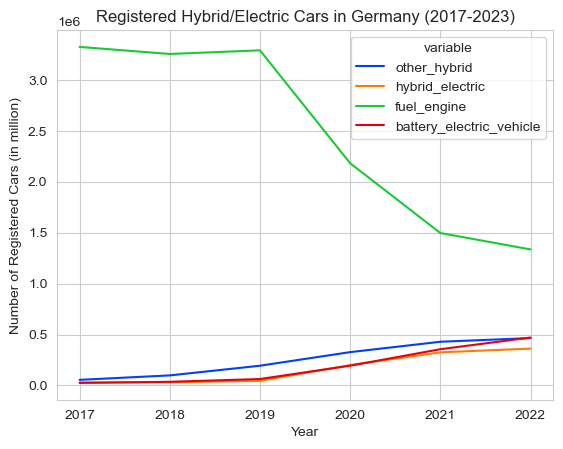

In [58]:
sns.set_style("whitegrid")

# Group the data by year
df_grouped = df_reg_cars_hybrid_analysis.groupby('year').sum().reset_index()

# Melt the dataframe to create a long format
df_melted = df_grouped.melt(id_vars=['year'], value_vars=['other_hybrid', 'hybrid_electric', 'fuel_engine', 'battery_electric_vehicle'])

# Create the plot
sns.lineplot(x='year', y='value', hue='variable', data=df_melted, palette='bright')

# Set the title and axes labels
plt.title('Registered Hybrid/Electric Cars in Germany (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Registered Cars (in million)')

# Show the plot
plt.show()


/var/folders/bf/d2vrr5gd0tjds1r8jvgyvq0w0000gn/T/ipykernel_3838/2827033814.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='year', y='fuel_engine', data=df_reg_cars_hybrid_analysis, color='green', ci=None)


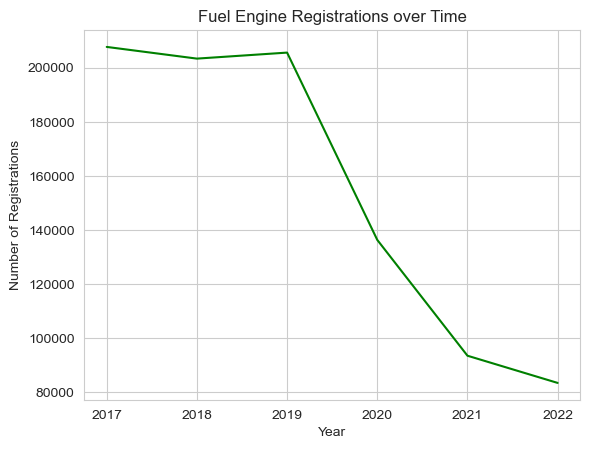

In [59]:
sns.lineplot(x='year', y='fuel_engine', data=df_reg_cars_hybrid_analysis, color='green', ci=None)
plt.title('Fuel Engine Registrations over Time')
plt.xlabel('Year')
plt.ylabel('Number of Registrations')
plt.show()


/var/folders/bf/d2vrr5gd0tjds1r8jvgyvq0w0000gn/T/ipykernel_3838/4183213518.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_reg_cars_hybrid_analysis.groupby('year').sum().reset_index()


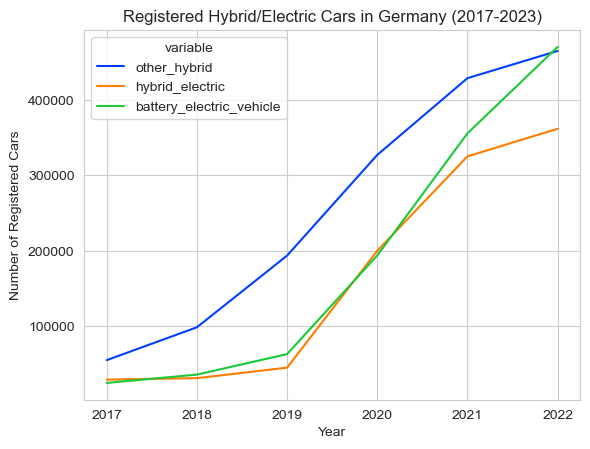

In [60]:
sns.set_style("whitegrid")

# Group the data by year
df_grouped = df_reg_cars_hybrid_analysis.groupby('year').sum().reset_index()

# Melt the dataframe to create a long format
df_melted = df_grouped.melt(id_vars=['year'], value_vars=['other_hybrid', 'hybrid_electric', 'battery_electric_vehicle'])

# Create the plot
sns.lineplot(x='year', y='value', hue='variable', data=df_melted, palette='bright')

# Set the title and axes labels
plt.title('Registered Hybrid/Electric Cars in Germany (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Number of Registered Cars')

# Show the plot
plt.show()


/var/folders/bf/d2vrr5gd0tjds1r8jvgyvq0w0000gn/T/ipykernel_3838/570614470.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df_registered_cars.groupby('year').sum().reset_index()


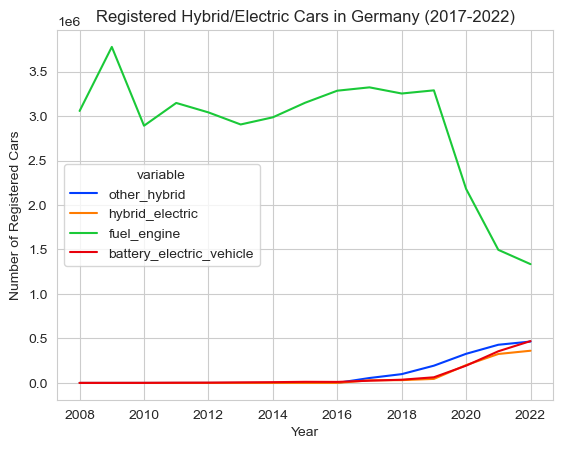

In [62]:
sns.set_style("whitegrid")

# Group the data by year
df_grouped = df_registered_cars.groupby('year').sum().reset_index()

# Melt the dataframe to create a long format
df_melted = df_grouped.melt(id_vars=['year'], value_vars=['other_hybrid', 'hybrid_electric', 'fuel_engine', 'battery_electric_vehicle'])

# Create the plot
sns.lineplot(x='year', y='value', hue='variable', data=df_melted, palette='bright')

# Set the title and axes labels
plt.title('Registered Hybrid/Electric Cars in Germany (2017-2022)')
plt.xlabel('Year')
plt.ylabel('Number of Registered Cars')

# Show the plot
plt.show()


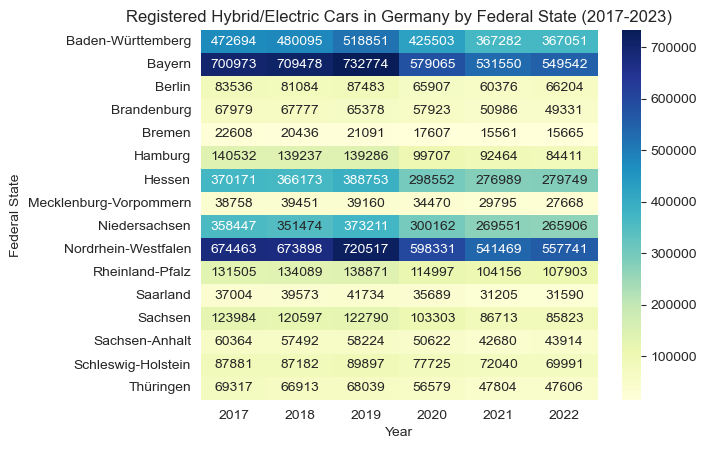

In [63]:
# Pivot the data to create a matrix for the heatmap
df_heatmap = df_reg_cars_hybrid_analysis.pivot(index='federal_state', columns='year', values='total')

# Create the heatmap
sns.heatmap(df_heatmap, cmap='YlGnBu', annot=True, fmt='g')

# Set the title and axes labels
plt.title('Registered Hybrid/Electric Cars in Germany by Federal State (2017-2023)')
plt.xlabel('Year')
plt.ylabel('Federal State')

# Show the plot
plt.show()


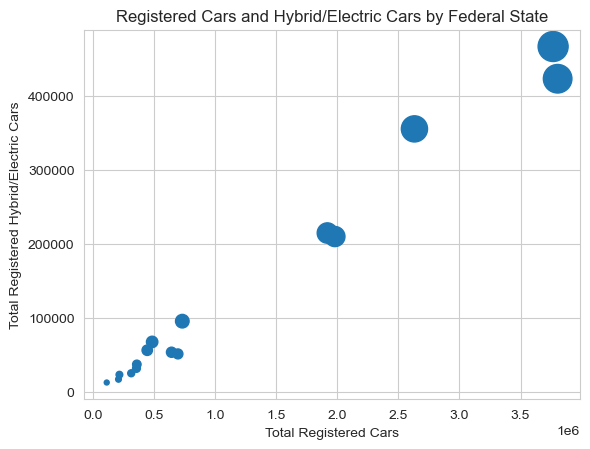

In [79]:
# Convert total hybrid and battery electric vehicle columns to float
df_grouped['hybrid_electric'] = df_grouped['hybrid_electric'].astype(float)
df_grouped['battery_electric_vehicle'] = df_grouped['battery_electric_vehicle'].astype(float)
df_grouped['total_fuel_cell_(hydrogen)'] = df_grouped['total_fuel_cell_(hydrogen)'].astype(float)

# Create the scatter plot
plt.scatter(x=df_grouped['total'], y=df_grouped['hybrid_electric']+df_grouped['battery_electric_vehicle']+df_grouped['total_fuel_cell_(hydrogen)'], s=(df_grouped['hybrid_electric']+df_grouped['battery_electric_vehicle']+df_grouped['total_fuel_cell_(hydrogen)'])/1000)

# Set the title and axes labels
plt.title('Registered Cars and Hybrid/Electric Cars by Federal State')
plt.xlabel('Total Registered Cars')
plt.ylabel('Total Registered Hybrid/Electric Cars')

# Show the plot
plt.show()


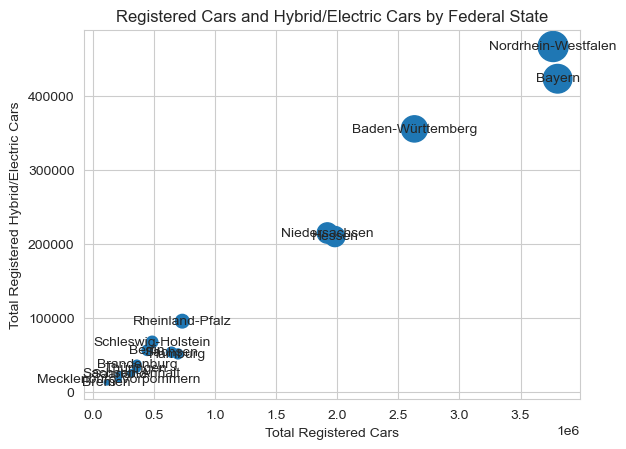

In [83]:
# Define dictionary of state abbreviations
state_abbr = {'Baden-Württemberg': 'BW',
              'Bayern': 'BY',
              'Berlin': 'BE',
              'Brandenburg': 'BB',
              'Bremen': 'HB',
              'Hamburg': 'HH',
              'Hessen': 'HE',
              'Mecklenburg-Vorpommern': 'MV',
              'Niedersachsen': 'NI',
              'Nordrhein-Westfalen': 'NW',
              'Rheinland-Pfalz': 'RP',
              'Saarland': 'SL',
              'Sachsen': 'SN',
              'Sachsen-Anhalt': 'ST',
              'Schleswig-Holstein': 'SH',
              'Thüringen': 'TH'}

# Group the data by federal state
df_grouped = df_reg_cars_hybrid_analysis.groupby('federal_state').sum().reset_index()

# Convert total hybrid and battery electric vehicle columns to float
df_grouped['hybrid_electric'] = df_grouped['hybrid_electric'].astype(float)
df_grouped['battery_electric_vehicle'] = df_grouped['battery_electric_vehicle'].astype(float)
df_grouped['total_fuel_cell_(hydrogen)'] = df_grouped['total_fuel_cell_(hydrogen)'].astype(float)

# Create the scatter plot
plt.scatter(x=df_grouped['total'], y=df_grouped['hybrid_electric']+df_grouped['battery_electric_vehicle']+df_grouped['total_fuel_cell_(hydrogen)'], s=(df_grouped['hybrid_electric']+df_grouped['battery_electric_vehicle']+df_grouped['total_fuel_cell_(hydrogen)'])/1000)

# Add federal state label to each bubble
for i, row in df_grouped.iterrows():
    plt.text(row['total'], row['hybrid_electric']+row['battery_electric_vehicle']+row['total_fuel_cell_(hydrogen)'], row['federal_state'], ha='center', va='center')

# Set the title and axes labels
plt.title('Registered Cars and Hybrid/Electric Cars by Federal State')
plt.xlabel('Total Registered Cars')
plt.ylabel('Total Registered Hybrid/Electric Cars')

# Show the plot
plt.show()


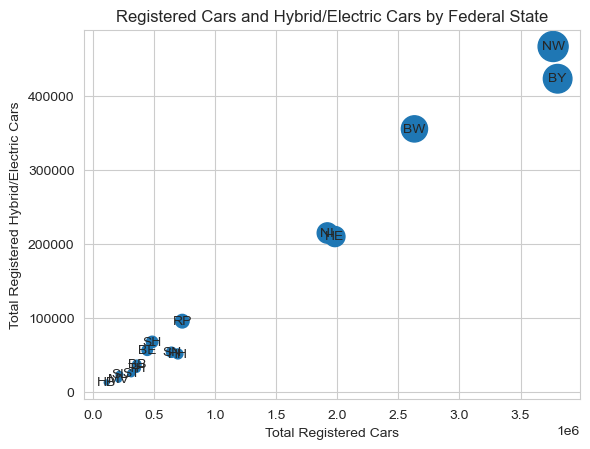

In [86]:
# Define dictionary of state abbreviations
state_abbr = {'Baden-Württemberg': 'BW',
              'Bayern': 'BY',
              'Berlin': 'BE',
              'Brandenburg': 'BB',
              'Bremen': 'HB',
              'Hamburg': 'HH',
              'Hessen': 'HE',
              'Mecklenburg-Vorpommern': 'MV',
              'Niedersachsen': 'NI',
              'Nordrhein-Westfalen': 'NW',
              'Rheinland-Pfalz': 'RP',
              'Saarland': 'SL',
              'Sachsen': 'SN',
              'Sachsen-Anhalt': 'ST',
              'Schleswig-Holstein': 'SH',
              'Thüringen': 'TH'}

# Group the data by federal state
df_grouped = df_reg_cars_hybrid_analysis.groupby('federal_state').sum().reset_index()

# Convert total hybrid and battery electric vehicle columns to float
df_grouped['hybrid_electric'] = df_grouped['hybrid_electric'].astype(float)
df_grouped['battery_electric_vehicle'] = df_grouped['battery_electric_vehicle'].astype(float)
df_grouped['total_fuel_cell_(hydrogen)'] = df_grouped['total_fuel_cell_(hydrogen)'].astype(float)

# Create the scatter plot
plt.scatter(x=df_grouped['total'], y=df_grouped['hybrid_electric']+df_grouped['battery_electric_vehicle']+df_grouped['total_fuel_cell_(hydrogen)'], s=(df_grouped['hybrid_electric']+df_grouped['battery_electric_vehicle']+df_grouped['total_fuel_cell_(hydrogen)'])/1000)

# Add state abbreviation label to each bubble
for i, row in df_grouped.iterrows():
    plt.text(row['total'], row['hybrid_electric']+row['battery_electric_vehicle']+row['total_fuel_cell_(hydrogen)'], state_abbr[row['federal_state']], ha='center', va='center')

# Set the title and axes labels
plt.title('Registered Cars and Hybrid/Electric Cars by Federal State')
plt.xlabel('Total Registered Cars')
plt.ylabel('Total Registered Hybrid/Electric Cars')

# Show the plot
plt.show()
